In [1]:
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

%matplotlib inline

# Return a Mendelian cross of the parents
def cross(parent1, parent2, times=20):
    # Get a list possible genotypes for the offspring
    genotypes = list(itertools.product(parent1, parent2))
    
    # Get a sample of offspring
    offspring = random.choices(genotypes, k=times)
    
    # Count the offspring genotypes
    off_types = Counter(offspring)

    return off_types

# Return a count of the phenotypes in a genotype dictionary
def read_phenotype(genotypes, dom_allel='R', phenos={}):
    # Setup translation dictionary, if necessary
    if len(list(phenos)) == 0: 
        phenos = {'R': 'red', 'r': 'red', 'B': 'brown', 'b': 'brown'}
    
    # Convert to phenotypes
    phenotypes = dict()
    
    for geno in list(genotypes):
        # Unpack the genotype tuple
        g1, g2 = geno
        
        # If either allel is dominant
        if g1 == dom_allel or g2 == dom_allel:
            # add the genotype count to the phenotype count
            if phenos[dom_allel] in list(phenotypes):
                phenotypes[phenos[dom_allel]] += genotypes[geno]
            else:
                phenotypes[phenos[dom_allel]] = genotypes[geno]
                
        # If both allels are recessive
        elif g1 != dom_allel and g2 != dom_allel:
            # sanity checks
            assert(g1 == g2 or g1 not in phenos or g2 not in phenos) 
            assert(g1 in phenos or g2 in phenos)
                        
            # Add the genotype count to the phenotype count
            pheno = phenos[g1 if g1 in phenos else g2]
                        
            if pheno in list(phenotypes):
                phenotypes[pheno] += genotypes[geno]
            else:
                phenotypes[pheno] = genotypes[geno]
                
    return phenotypes

# Return the difference of offspring with different pheontypes
def score(phenotypes, phenos_list=['red','brown']):
    assert(len(list(phenotypes)) > 0)
    
    scores = list()
                   
    # Score the dictionary
    for this_pheno in phenotypes:
        assert(phenos_list[0] in list(this_pheno) or phenos_list[1] in list(pheno))
    
        # Get points for each colour
        red_points = 0
        brown_points = 0
    
        if phenos_list[0] in list(this_pheno):
            red_points = this_pheno[phenos_list[0]]
        if phenos_list[1] in list(this_pheno):
            brown_points = this_pheno[phenos_list[1]]
            
        # get difference in points
        scores.append(red_points - brown_points)
            
    return scores



def plot(scores1, scores2):
    scores1_counted = Counter(scores1)
    scores2_counted = Counter(scores2)
        
    x_axis = set(list(scores1_counted)).union(set(list(scores2_counted)))
    x_axis = sorted(x_axis)
        
    scores1_sorted = list()
    scores2_sorted = list()
    for x in x_axis:
        if x in list(scores1_counted):
            scores1_sorted.append(scores1_counted[x])
        else:
            scores1_sorted.append(0)
            
        if x in list(scores2_counted):
            scores2_sorted.append(scores2_counted[x])
        else:
            scores2_sorted.append(0)
            
        
    
    plt.subplot(2, 1, 1)
    plt.plot(x_axis, scores1_sorted, 'o-')
    
    plt.subplot(2, 1, 2)
    plt.plot(x_axis, scores2_sorted, '.-')
    
    plt.show()
    

## Experiment 1: Red-coat Mendelian Dominant

In this experiment, we assume that the the red coat is dominant to the brown coat. We hypothesize that this could be the case
based on the results of the second IRL trial.

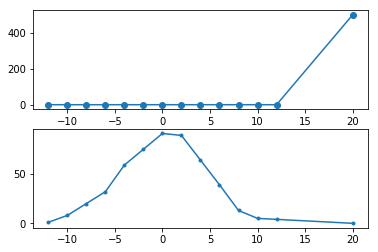

In [2]:
mother1 = ('R', 'R') # homozygous dominant
mother2 = ('R', 'b') # heterozygous dominant
father = ('b', 'b') # homozygous recessive

pair1 = (mother1, father)
pair2 = (mother2, father)

trials = 500

# Initialize results dictionary
results = {pair1: list(), pair2: list()}

# Collect possible phenotypes
for _ in range(trials):
    
    # Get crosses
    cross1 = cross(*pair1)
    cross2 = cross(*pair2)

    # Get phenotypes
    pheno1 = read_phenotype(cross1)
    pheno2 = read_phenotype(cross2)
    
    # Collect results
    results[pair1].append(pheno1)
    results[pair2].append(pheno2)
    
    
# Plot results
pair1_scores = score(results[pair1])
pair2_scores = score(results[pair2])

plt.title("Crossings with Homozygous Recessive Father")
plot(pair1_scores, pair2_scores)

## Experiment 2: Red-coat X-linked Dominant

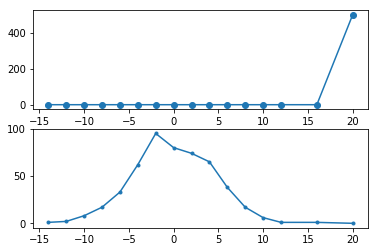

In [3]:
mother1 = ('Xr', 'Xr') # homozygous dominant
mother2 = ('Xr', 'Xb') # heterozygous dominant
father = ('Xb', 'y') # x-linked recessive

x_colours = {'Xr': 'red', 'Xb': 'brown'}

pair1 = (mother1, father)
pair2 = (mother2, father)

trials = 500

# Initialize results dictionary
results = {pair1: list(), pair2: list()}

# Collect possible phenotypes
for _ in range(trials):
    
    # Get crosses
    cross1 = cross(*pair1)
    cross2 = cross(*pair2)

    # Get phenotypes
    pheno1 = read_phenotype(cross1, dom_allel='Xr', phenos=x_colours)
    pheno2 = read_phenotype(cross2, dom_allel='Xr', phenos=x_colours)
    
    # Collect results
    results[pair1].append(pheno1)
    results[pair2].append(pheno2)
    
    
# Plot results
pair1_scores = score(results[pair1])
pair2_scores = score(results[pair2])

plt.title("Crossings with X-Linked Recessive Father")
plot(pair1_scores, pair2_scores)